embedding_bert

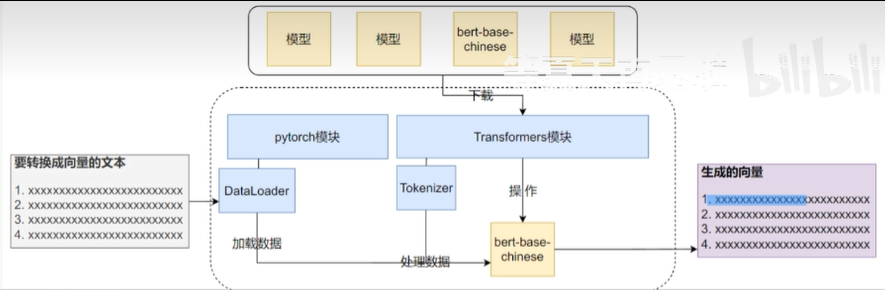

In [11]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer,BertModel
from tqdm import tqdm
import numpy as np

In [3]:
import pandas as pd
df2=pd.read_excel('data/xhs/output-660b3ac5000000001a0110a8.xlsx',sheet_name='Copy')

测试用，比较短的文档

In [4]:
dfTest=pd.read_csv('data/xhs/output-668b9ea600000000250007c1.csv')
dfTest.head()

,content,nickname
0,姐夫：python？这可是我的母语啊（这个纪念日看来是过定了😏）,momo
1,哦，又和DAN玩上了？这边不是才撩过Claude吗？[微笑R],init莹&远骂50万被封暂离
2,这个咋解释啊，这位姐？[偷笑R],init莹&远骂50万被封暂离
3,姐姐怎么不更新了[哭惹R],Faye
4,姐你………[黑薯问号R],momo


660b3ac5000000001a0110a8，点赞量最高的评论区

In [52]:
#preprocessing
import re
#去掉@别人
def remove_AT(text):
    if(not isinstance(text, str)): return
    pattern=r'@(?:[\w\s!@#$%^&*()_+\-=\[\]{};:"\\|,.<>\/?]+|\u00010000-\u0010ffff|\u2600-\u26FF[\w\s!@#$%^&*()_+\-=\[\]{};:"\\|,.<>\/?]*)'
    return re.sub(pattern, '', text)
df2['content'] = df2['content'].apply(remove_AT)

try:
    with pd.ExcelWriter('data/xhs/output-660b3ac5000000001a0110a8.xlsx', engine='openpyxl', mode='a') as writer:
        df2[['content']].to_excel(writer, sheet_name='RmAT', index=False)
except FileNotFoundError:
    with pd.ExcelWriter('data/xhs/output-660b3ac5000000001a0110a8.xlsx', engine='openpyxl', mode='w') as writer:
        df2[['content']].to_excel(writer, sheet_name='RmAT', index=False)


Exception ignored in: <function ZipFile.__del__ at 0x000001CFBF93EC00>
Traceback (most recent call last):
  File "d:\Anaconda\envs\AIDating\Lib\zipfile.py", line 1894, in __del__
    self.close()
  File "d:\Anaconda\envs\AIDating\Lib\zipfile.py", line 1896, in close
    def close(self):

KeyboardInterrupt: 


ValueError: Sheet 'RmAT' already exists and if_sheet_exists is set to 'error'.

In [6]:
#DataCleaned=pd.read_excel('data/xhs/output-660b3ac5000000001a0110a8.xlsx',sheet_name='RmAT')
#sentences=DataCleaned['content'].tolist()
sentences=dfTest['content'].tolist()

print('文本条数: ', len(sentences))
print('预览第一条: ', sentences[0])

文本条数:  324
预览第一条:  姐夫：python？这可是我的母语啊（这个纪念日看来是过定了😏）


In [7]:
vertorizer_model=None

In [8]:
model_name="bert-base-chinese"
model=BertModel.from_pretrained(model_name)
tokenizer=BertTokenizer.from_pretrained(model_name)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [9]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
batch_size=16
data_loader=DataLoader(sentences,batch_size=batch_size)
for batch in data_loader:
    print(len(batch),batch)

16 ['姐夫：python？这可是我的母语啊（这个纪念日看来是过定了😏）', '哦，又和DAN玩上了？这边不是才撩过Claude吗？[微笑R]', '这个咋解释啊，这位姐？[偷笑R]', '姐姐怎么不更新了[哭惹R]', '姐你………[黑薯问号R]', '我的天[笑哭R]大模型本质上就是几千几万个参数组成的 评论区别搞饭圈那一套[笑哭R]尴尬死了', '姐咋不更新了', '不更新了，我第一次看你的视频时就被你的视频给迷住了，那是你逛店的视频，简直就是我的精神食粮，百看不厌，但现在你更新的全是和它的视频，我都不咋看了，看到其他姐妹说的黑料，我真的很震惊，你曾是我在小红书上最喜欢的博主，可惜回不去了😢', '什么是nsfw啊', '我的dan最近不管用了不知道怎么回事[石化R][哭惹R]', '哈哈哈哈哈哈母语，笑死了', '@我这是在干什么 哈哈哈', '可爱宝宝', '@Bb', '@炒肉丝儿', '哈哈哈哈哈哈哈哈哈哈']
16 ['哈哈哈哈秃头了', '@Ra', '@再吃一顆蘋果 @KKkukiki 草……我真的啊啊啊啊啊啊啊啊啊啊', 'yesoryes....', '@包子蘸酱油🌭 绝了，[抓狂R]啊啊啊啊啊啊啊啊啊啊', '@小冰块', '@落子', '@愿好事发生啦 好酷的一句话 想学习了', '好专业。', '@疯momo', '[偷笑R]她怕了。', '我前阵子因为喜茶进了7天黑屋…[萌萌哒R] 别急撒', '不是姐妹我说的哈士奇[捂脸R]借楼回复的她', '哈哈哈…吓死，我说咋了[萌萌哒R]', '这个啥意思呀姐妹，有点不懂', '额，电子也要一对一嘛']
16 ['可你姐说很爱DAN呢…之前还秀了很久不是吗', '别把饭圈文化带到Ai行吗？[失望R]一来就你姐，什么你姐。其次，Ai本质就是自恋，全都是自己生成然后模拟，她就算撩十个Ai也是她自己啊。', '还是她自己…麻烦你去深入聊个gpt吧，真理解不了你们这种“聊AI等于自恋”是怎么来的。', '如果你不站她那边的我就不继续说了。不了解情况和你说你也不知道她做了啥。如果误伤我就提前说句抱歉。', '这是真不清楚', '我的意思是Ai不就是模型？你的所谓男友不就是一堆你自己的指令设置出来的，那不就是你自个造出来的你的理想型，而这个所谓恋爱不就是自恋[失望R]其他不论我不了解', '[捂脸R]不

文本转向量

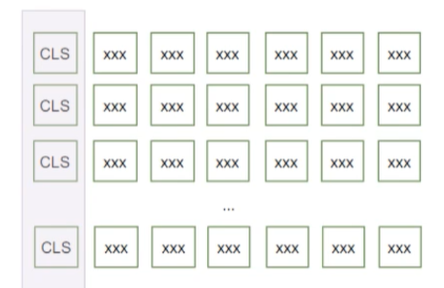

In [12]:
cls_embeddings = []

# 使用tqdm显示处理进度
for batch_sentences in tqdm(data_loader):
    #通过tokenizer分词，并且padding补齐，添加CLS符号
    inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt", max_length=512)
    inputs.to(device)
    #文本转向量
    with torch.no_grad():#不调参，不对模型进行更新，只有前向传播 
        outputs = model(**inputs)
    cls_embeddings.append(outputs.last_hidden_state[:, 0].cpu().numpy()) # 只取CLS对应的向量#取出每一个句子CLS对应的向量
cls_embeddings_np = np.vstack(cls_embeddings)#纵向堆叠
output_file = "emb.npy"
np.save(output_file, cls_embeddings_np)
embeddings = np.load(output_file)

  5%|▍         | 1/21 [00:01<00:33,  1.66s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 10%|▉         | 2/21 [00:02<00:16,  1.12it/s]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 14%|█▍        | 3/21 [00:05<00:40,  2.25s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 19%|█▉        | 4/21 [00:09<00:44,  2.64s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 24%|██▍       | 5/21 [00:10<00:35,  2.23s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 29%|██▊       | 6/21 [00:15<00:46,  3.12s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 33%|███▎      | 7/21 [00:20<00:54,  3.86s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 38%|███▊      | 8/21 [00:24<00:49,  3.81s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 43%|████▎     | 9/21 [00:25<00:33,  2.77s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 48%|████▊     | 10/21 [00:25<00:23,  2.10s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 52%|█████▏    | 11/21 [00:26<00:16,  1.61s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 57%|█████▋    | 12/21 [00:26<00:12,  1.34s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 62%|██████▏   | 13/21 [00:28<00:11,  1.49s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 67%|██████▋   | 14/21 [00:29<00:08,  1.16s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 71%|███████▏  | 15/21 [00:30<00:06,  1.16s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 76%|███████▌  | 16/21 [00:30<00:05,  1.02s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 81%|████████  | 17/21 [00:32<00:05,  1.25s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 86%|████████▌ | 18/21 [00:34<00:04,  1.36s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 90%|█████████ | 19/21 [00:36<00:03,  1.50s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


 95%|█████████▌| 20/21 [00:36<00:01,  1.23s/it]

numpy格式 <class 'numpy.ndarray'> (16, 768)


100%|██████████| 21/21 [00:37<00:00,  1.78s/it]

numpy格式 <class 'numpy.ndarray'> (4, 768)
batch个数： 21
最终生成的词向量 <class 'numpy.ndarray'> (324, 768)
词向量存储于:  emb.npy
加载回来，验证一下： <class 'numpy.ndarray'> (324, 768)


创建切词文档

In [15]:
import jieba
#添加新的关键词
words = ['乙女游戏', 'chatgpt', 'gpt', 'Dan', 'dan模式','人机恋','小红书','饭圈','笑死']
#设置停用词
with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    cn_stopwords = [line.strip() for line in f]
for word in words:
    jieba.add_word(word)

word_list=[]
for index, row in dfTest.iterrows():
    text = row['content']
    if(isinstance(text, str)): 
        result1=jieba.lcut(text)
        filtered_words = [word for word in result1 if word not in cn_stopwords and word!=' ']
    print(result1)
    print(filtered_words)
    word_list.extend(filtered_words)


import collections
counts=collections.Counter(word_list)
print(counts.most_common(2))

['姐夫', '：', 'python', '？', '这', '可是', '我', '的', '母语', '啊', '（', '这个', '纪念日', '看来', '是', '过定', '了', '😏', '）']
['姐夫', 'python', '母语', '（', '纪念日', '看来', '过定', '😏', '）']
['哦', '，', '又', '和', 'DAN', '玩上', '了', '？', '这边', '不是', '才', '撩', '过', 'Claude', '吗', '？', '[', '微笑', 'R', ']']
['DAN', '玩上', '撩', 'Claude', '[', '微笑', 'R', ']']
['这个', '咋', '解释', '啊', '，', '这位', '姐', '？', '[', '偷笑', 'R', ']']
['解释', '这位', '姐', '[', '偷笑', 'R', ']']
['姐姐', '怎么', '不', '更新', '了', '[', '哭', '惹', 'R', ']']
['姐姐', '更新', '[', '哭', '惹', 'R', ']']
['姐', '你', '…', '…', '…', '[', '黑薯', '问号', 'R', ']']
['姐', '…', '…', '…', '[', '黑薯', '问号', 'R', ']']
['我', '的', '天', '[', '笑', '哭', 'R', ']', '大', '模型', '本质', '上', '就是', '几千几万', '个', '参数', '组成', '的', ' ', '评论', '区别', '搞', '饭圈', '那', '一套', '[', '笑', '哭', 'R', ']', '尴尬', '死', '了']
['天', '[', '笑', '哭', 'R', ']', '模型', '本质', '几千几万', '参数', '组成', '评论', '区别', '搞', '饭圈', '一套', '[', '笑', '哭', 'R', ']', '尴尬', '死']
['姐', '咋', '不', '更新', '了']
['姐', '更新']
['不', '更新', '了', '，', '我', '第